In [19]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import pickle


def project_dir():
    notebook_path = %pwd
    repo_name = "sisi"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

from Utils.data_utils import get_data_and_state_list, get_data_and_country_list

# USA

In [9]:
df_list, state_list = get_data_and_state_list(pwd="..")

In [10]:
with open("../data/predictions/dnn_pred_usa.pkl", "rb") as f:
    preds_list = pickle.load(f)

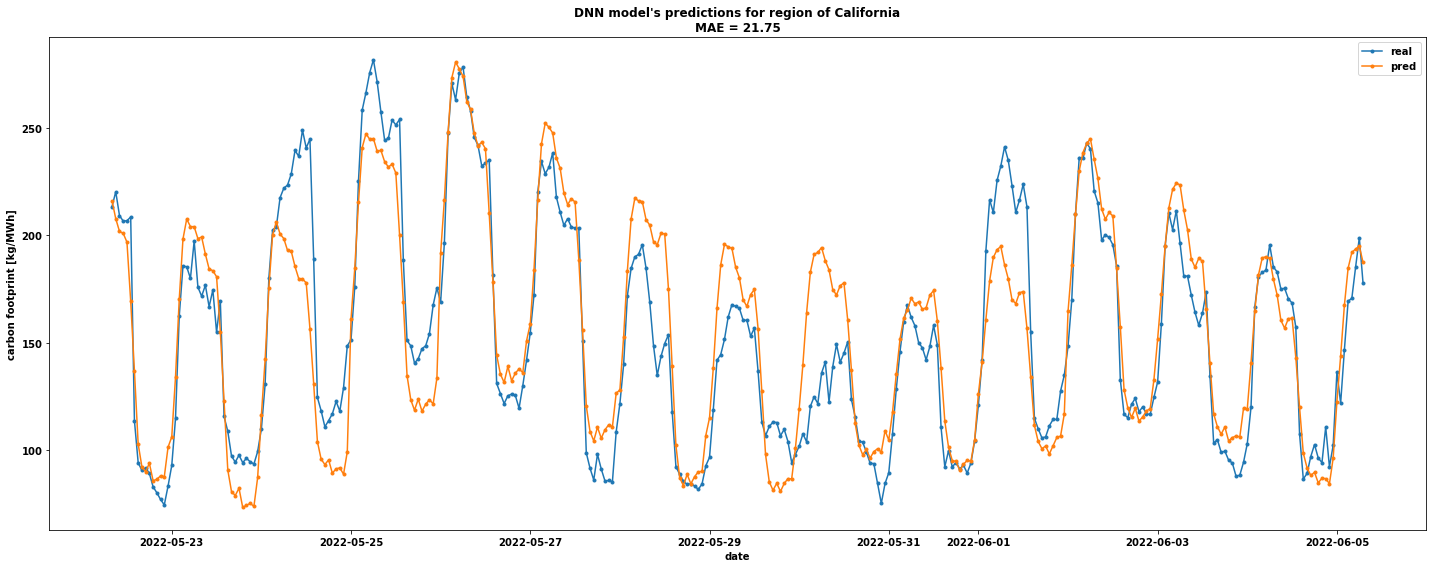

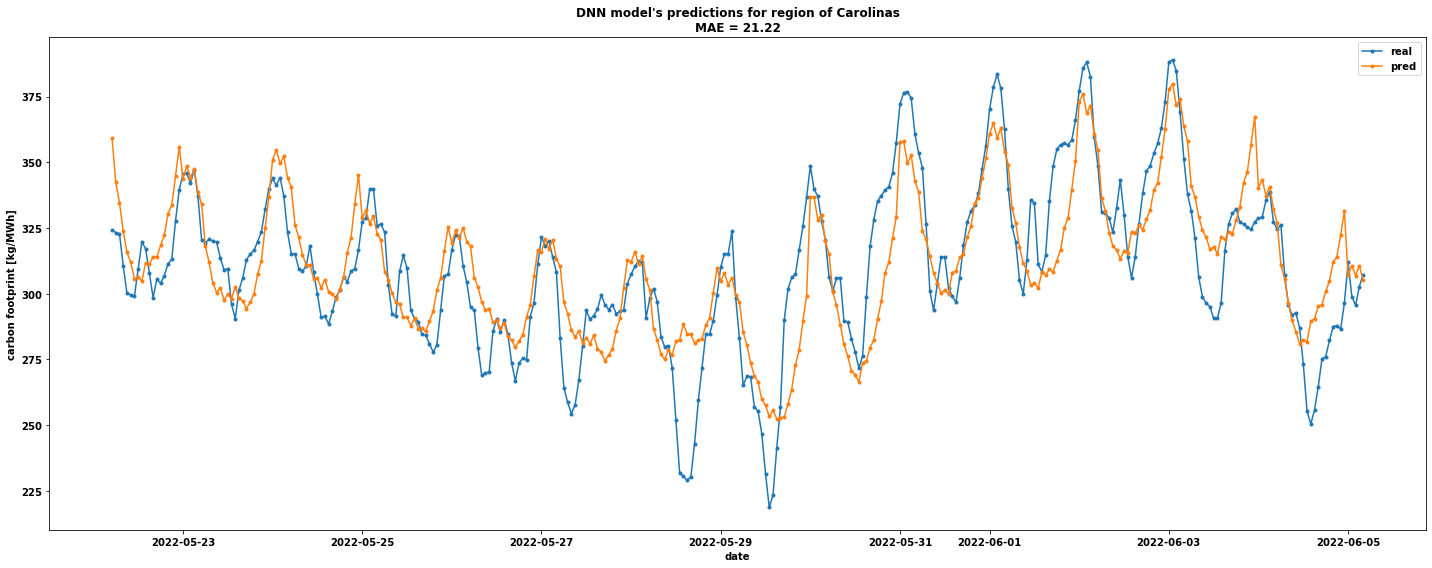

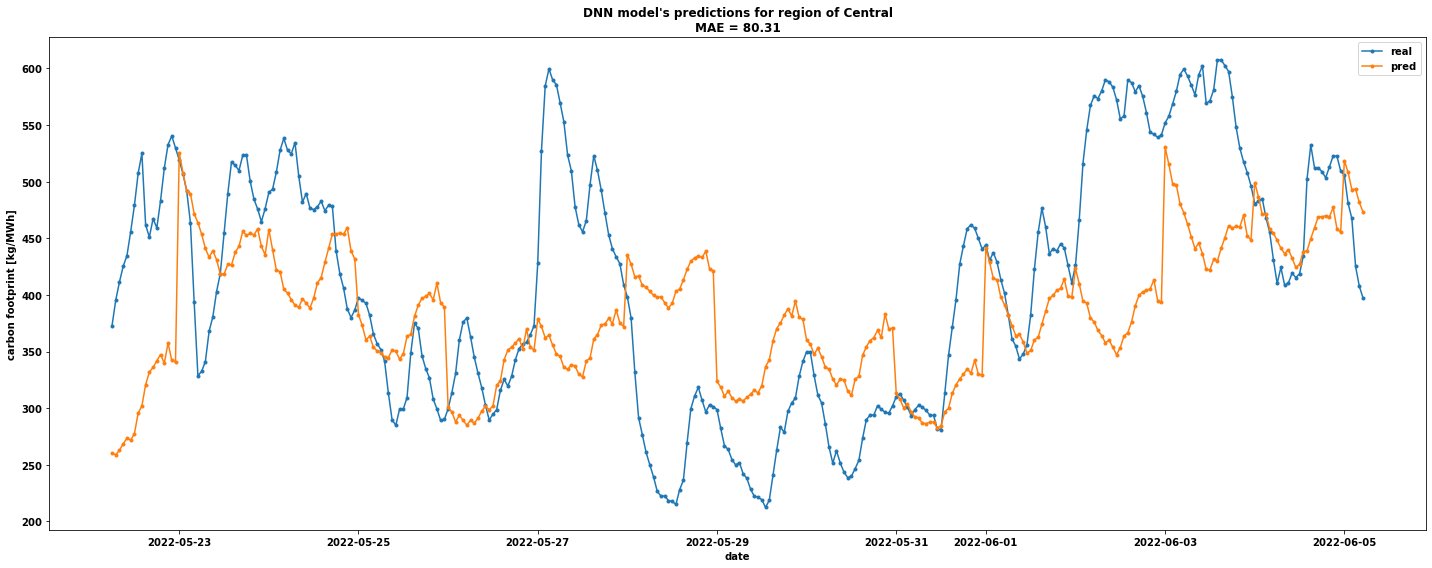

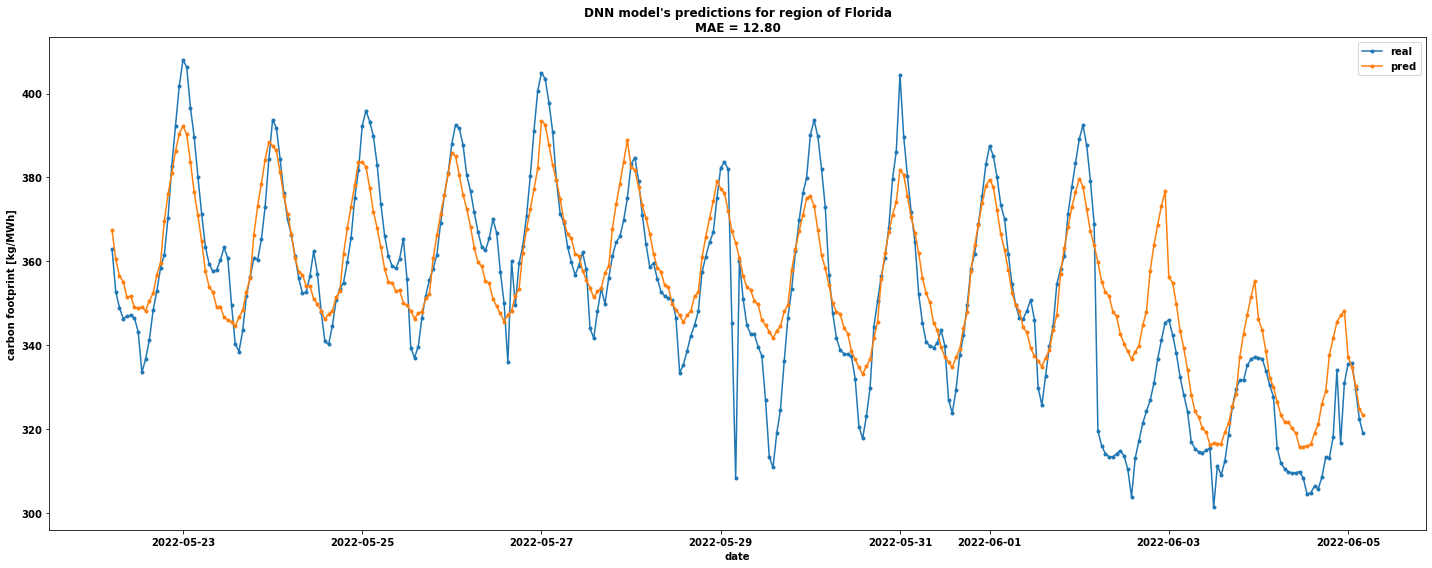

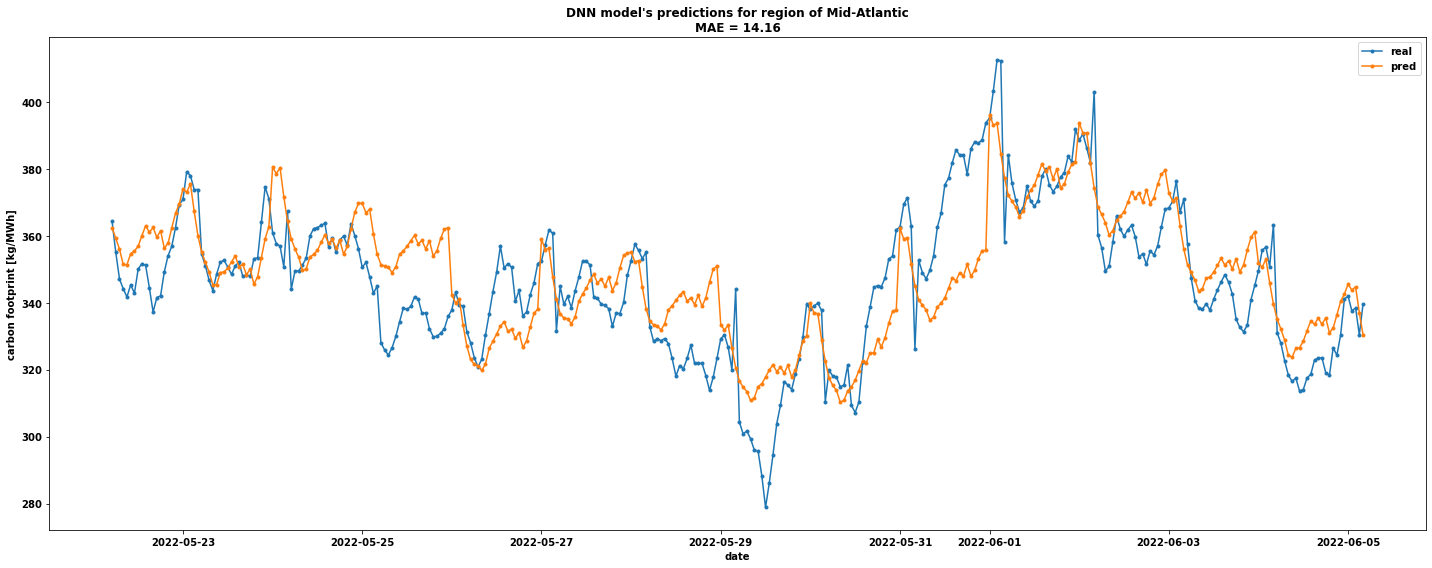

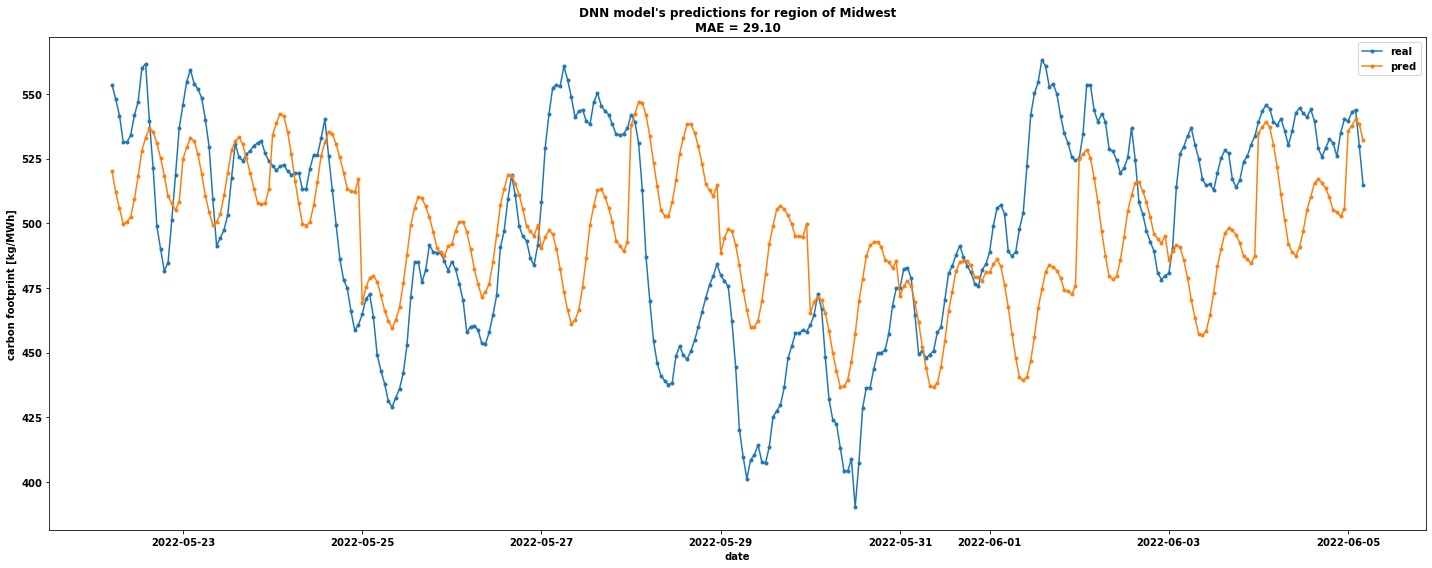

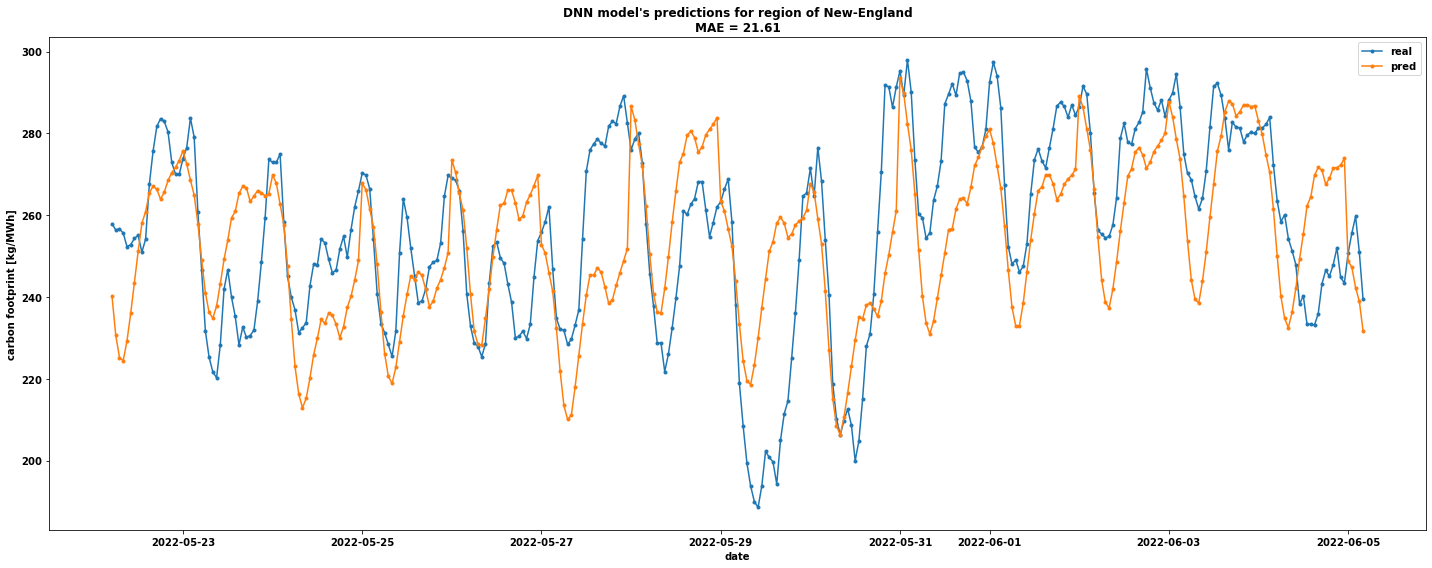

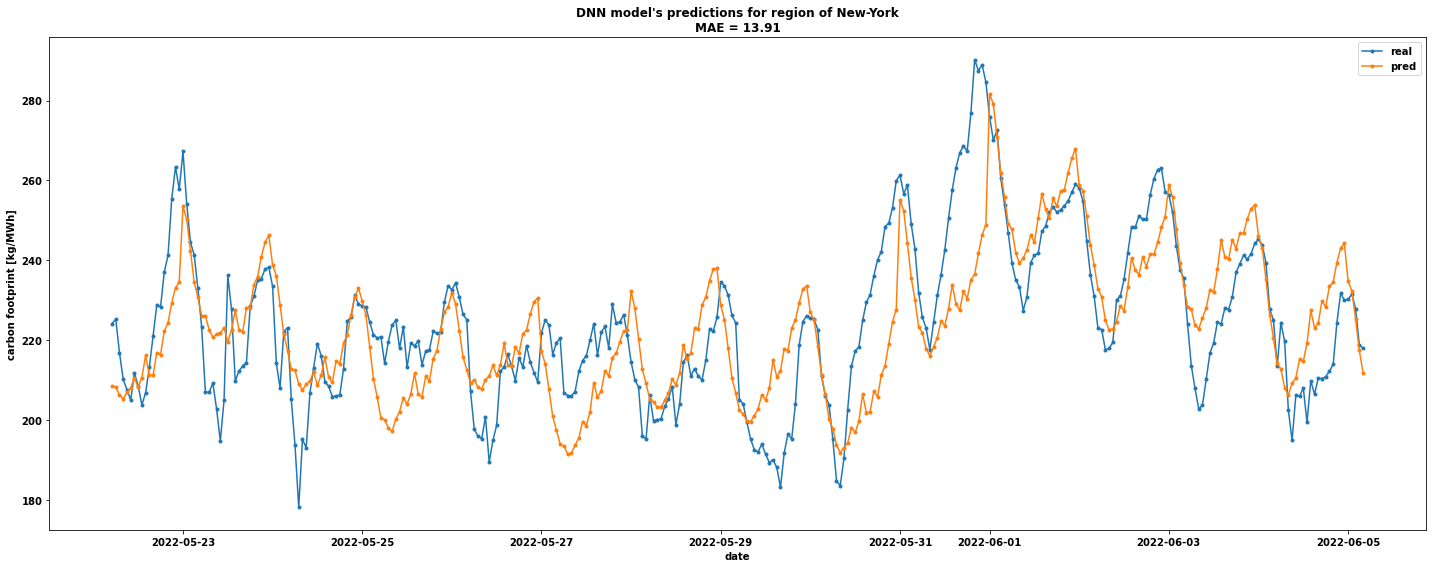

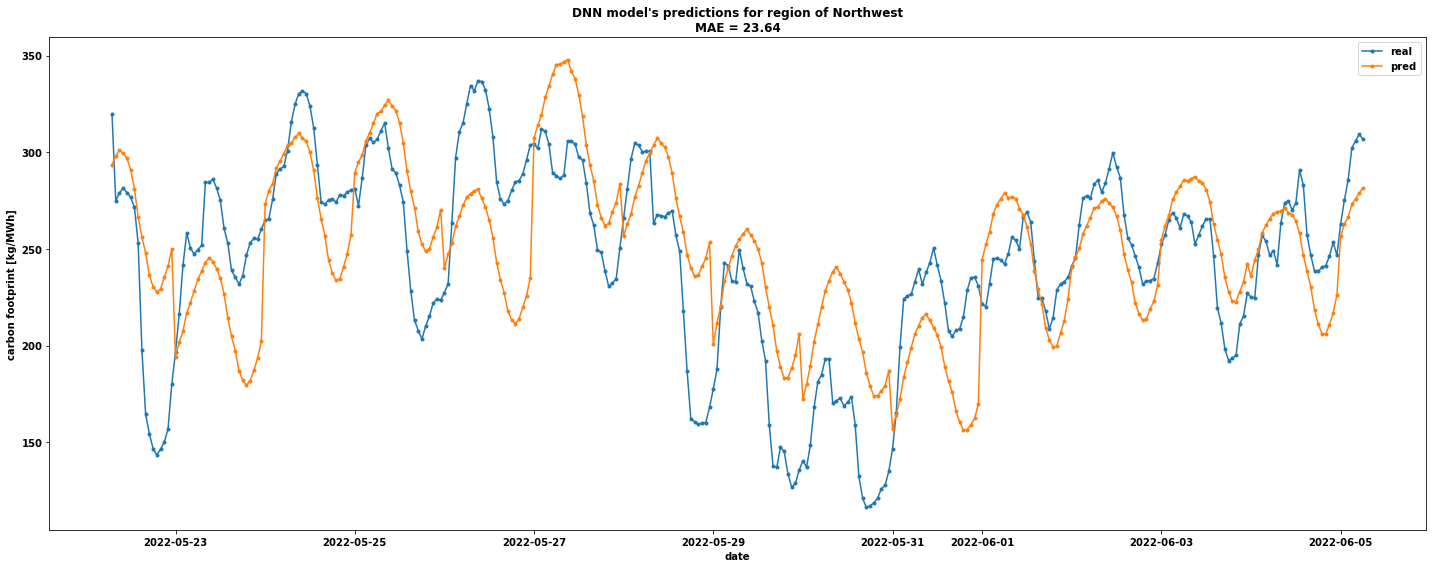

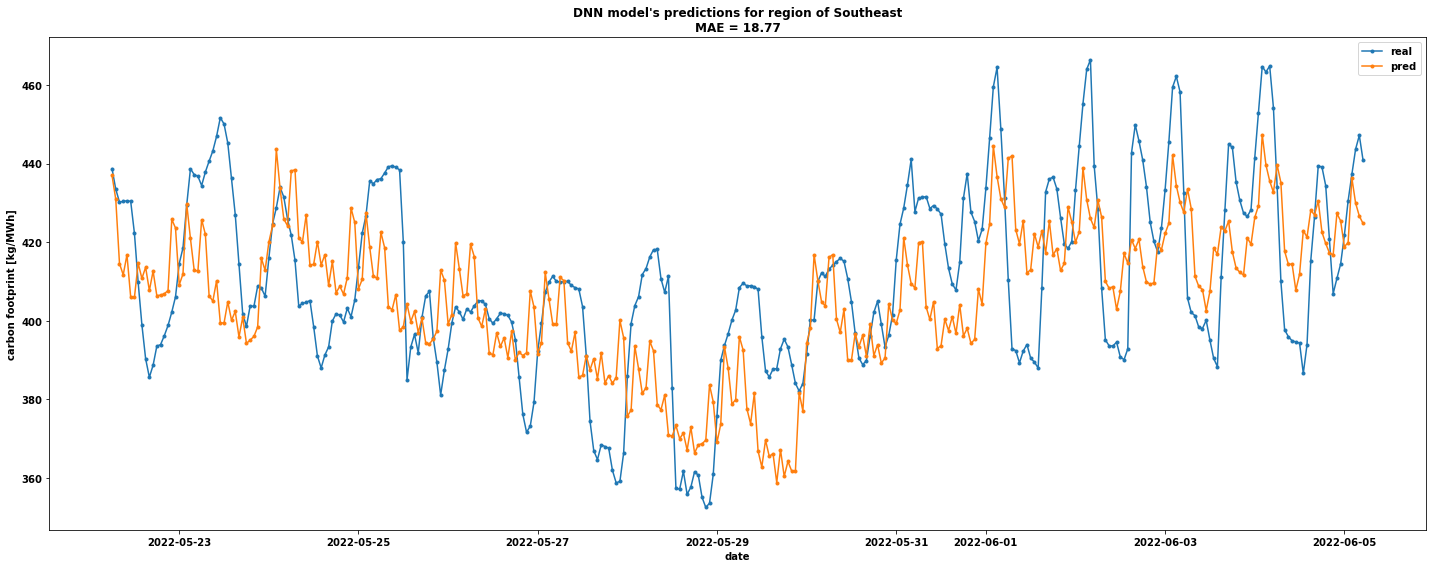

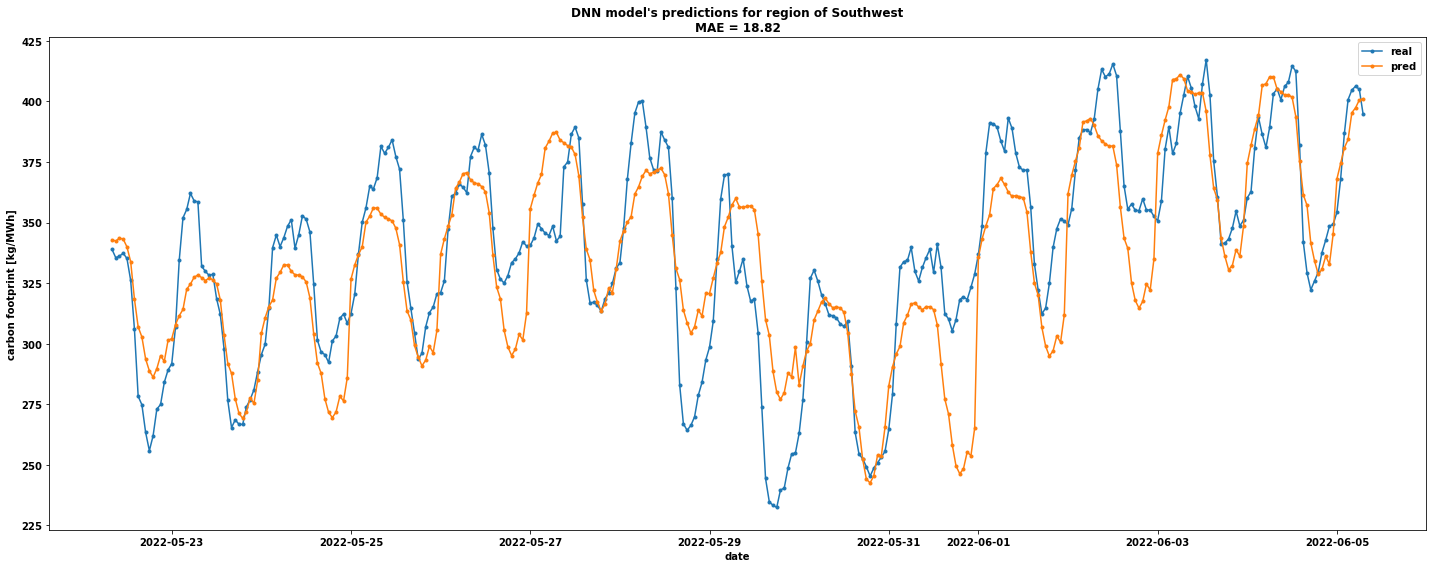

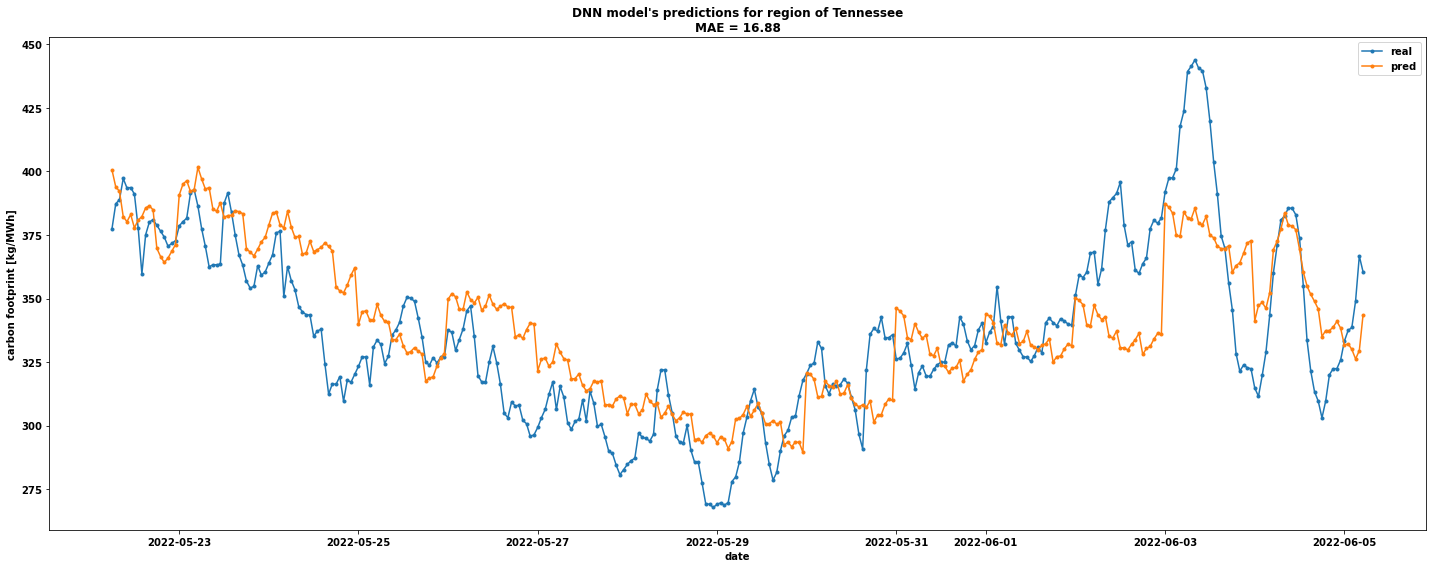

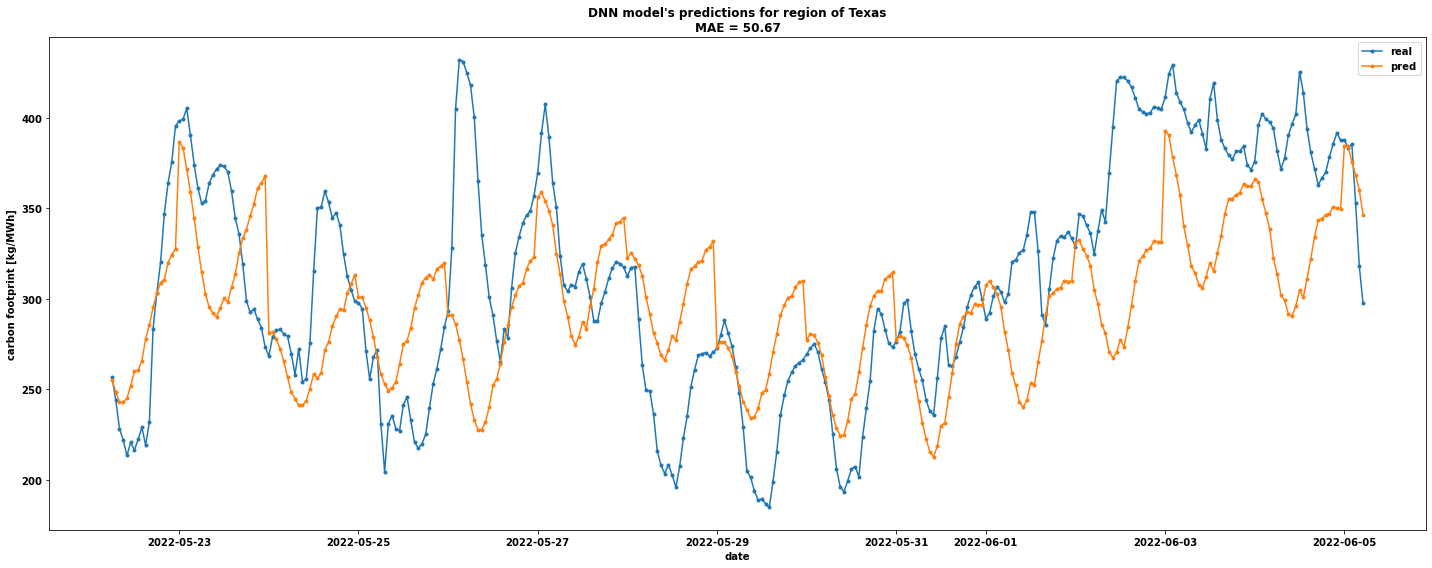

In [17]:
for state, df, pred_dict in zip(state_list, df_list, preds_list):
    
    df.datetime = pd.to_datetime(df.datetime)
    
    x = list(pred_dict.keys())
    preds = list(pred_dict.values())
    real = df.loc[df.datetime.dt.year >= 2022, "carbon_per_MWh"].to_numpy()
    
    mae = np.mean(np.abs(real-preds))
    
    n = 14*24
    x, preds, real = x[-n:], preds[-n:], real[-n:]
    
    f = plt.figure(figsize=(20,8))
    plt.plot(x, real, '.-', label="real")
    plt.plot(x, preds, '.-', label="pred")
    plt.title(f"DNN model's predictions for region of {state}\nMAE = {mae:.2f}")
    plt.xlabel("date")
    plt.ylabel("carbon footprint [kg/MWh]")
    plt.legend()
    plt.tight_layout()
    # plt.savefig(f"../data/USA/images/{state}_dnn_preds.pdf")

plt.show()

# EU

In [20]:
df_list, state_list = get_data_and_country_list(pwd="..")

In [21]:
with open("../data/predictions/dnn_pred_eu.pkl", "rb") as f:
    preds_list = pickle.load(f)

In [22]:
country_lut = {
    "CH": "Switzerland",
    "CZ": "Czechia",
    "DK": "Denmark",
    "ES": "Spain",
    "FI": "Finland",
    "FR": "France",
    "IT": "Italy",
    "PL": "Poland",
    "SE": "Sweden"
}

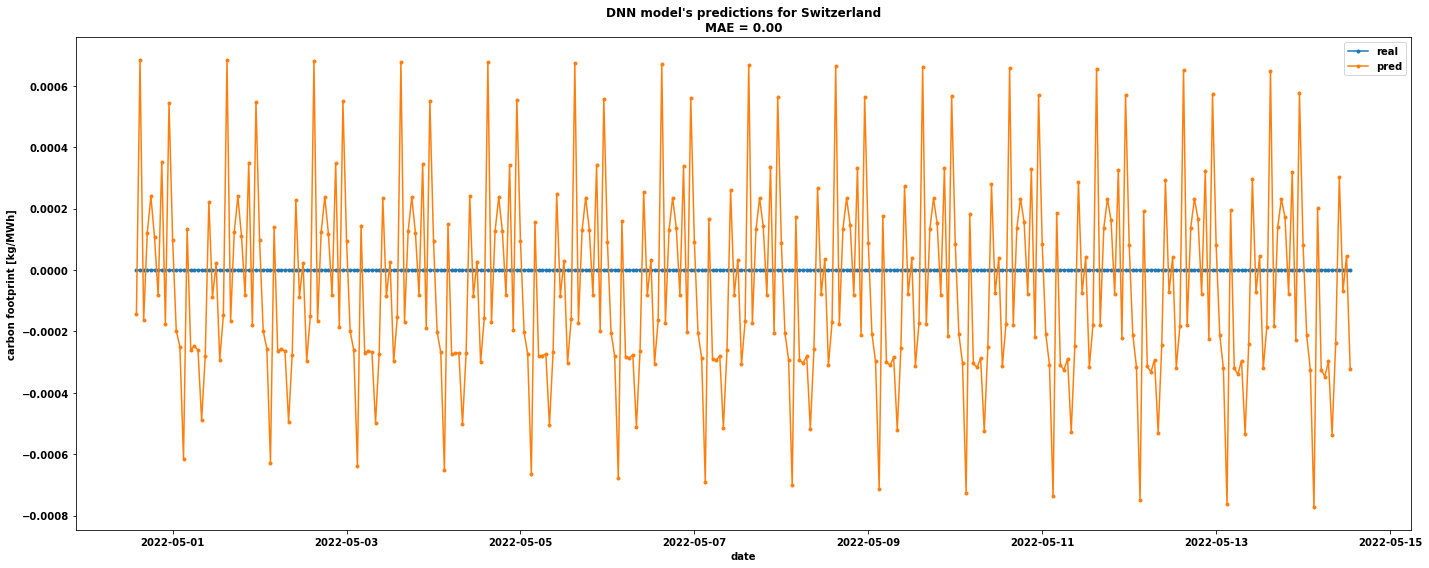

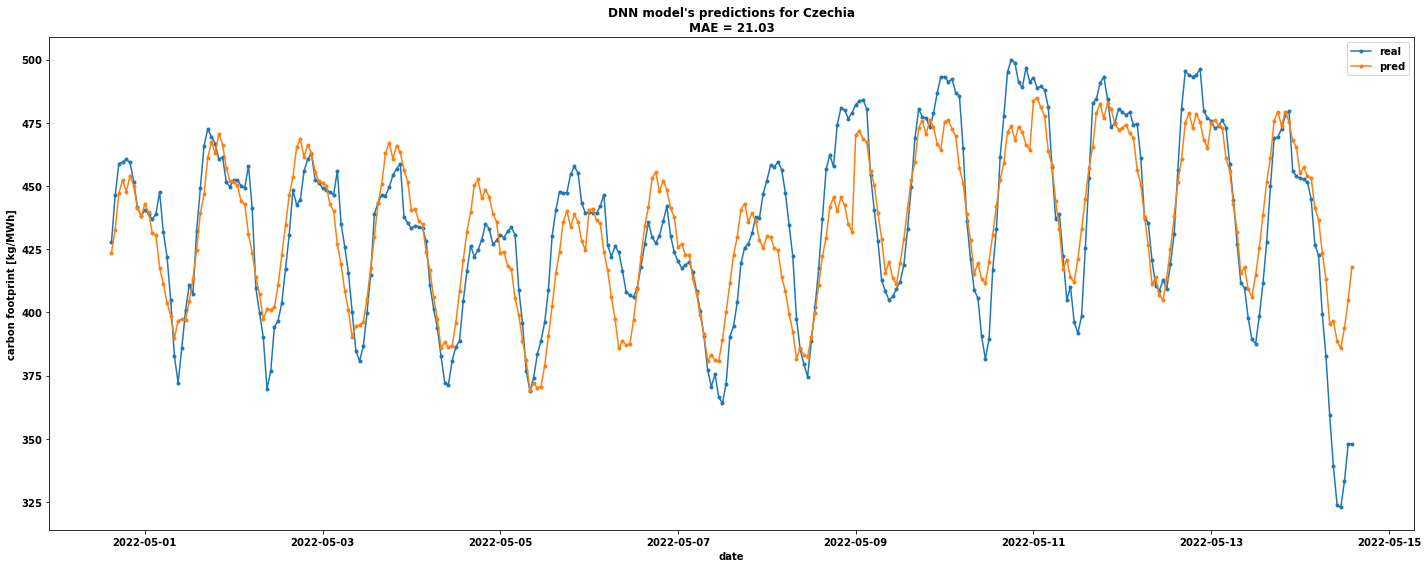

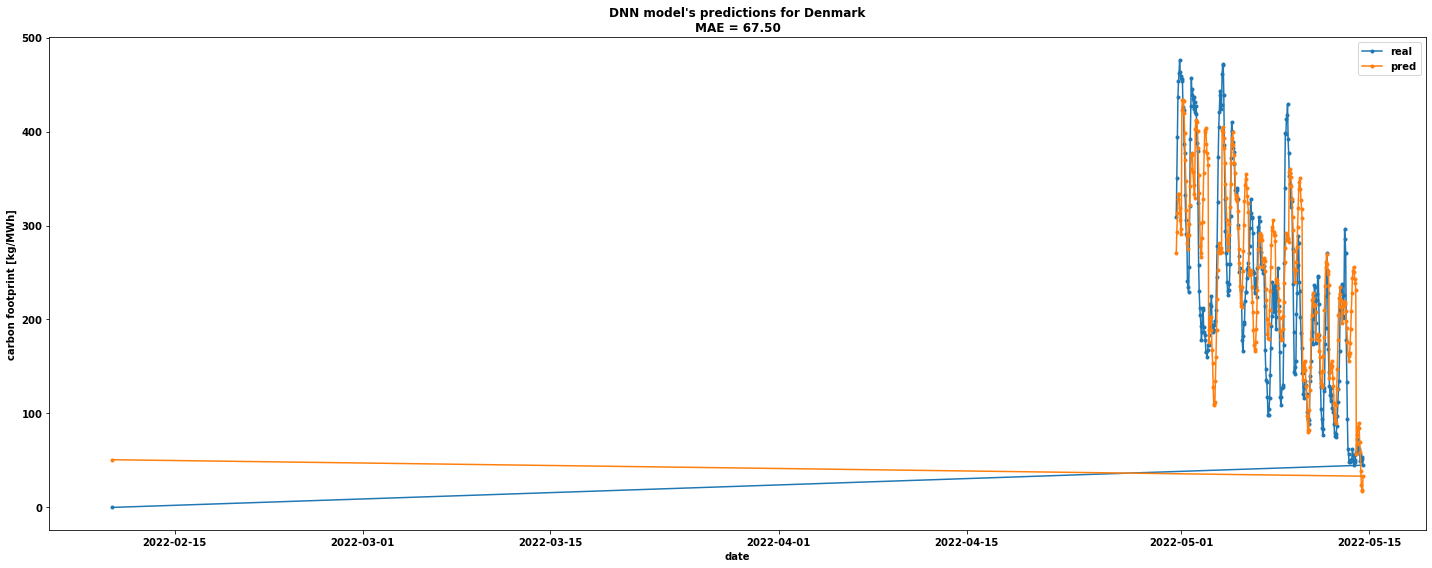

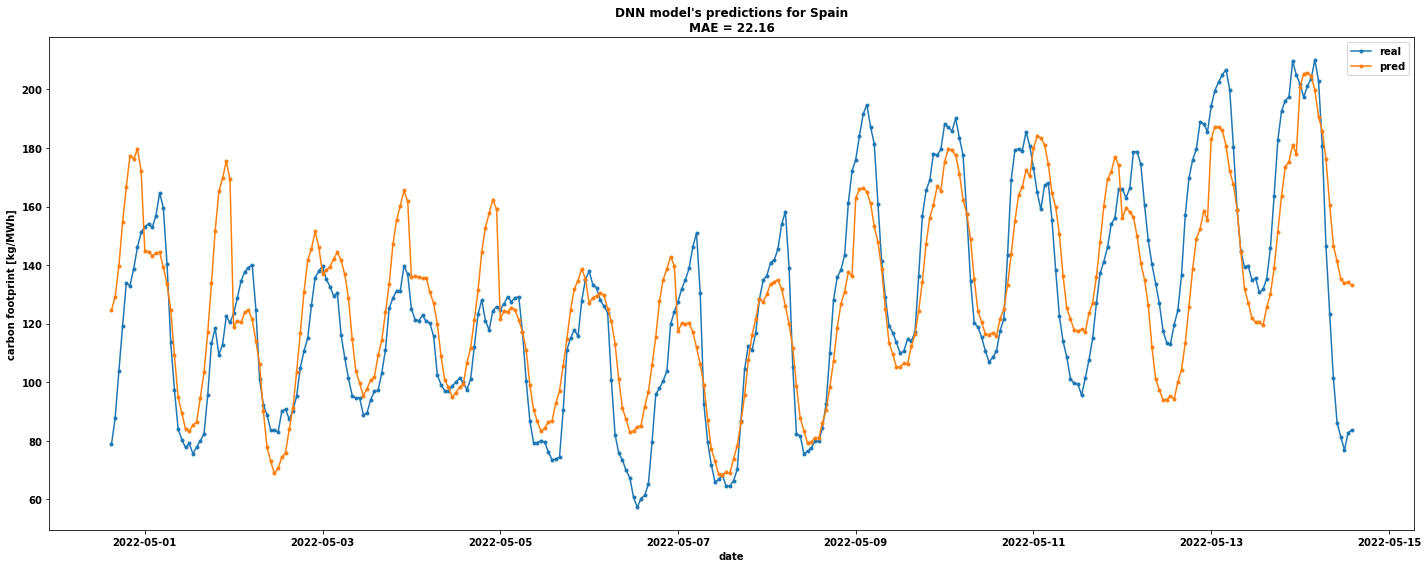

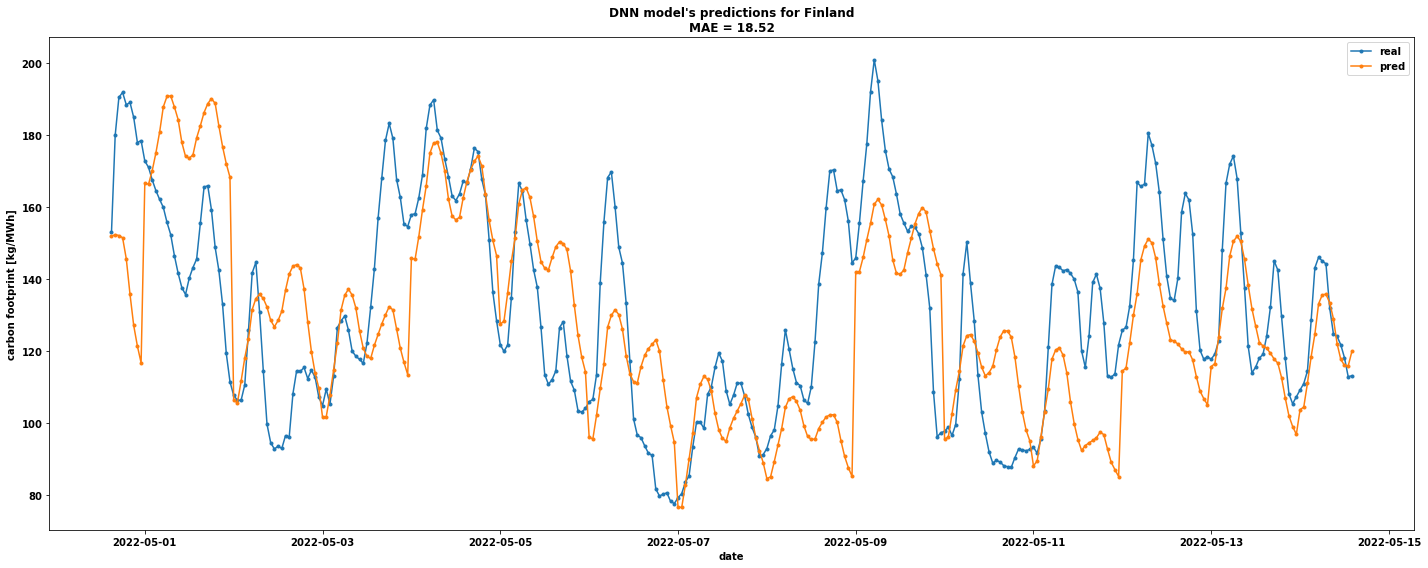

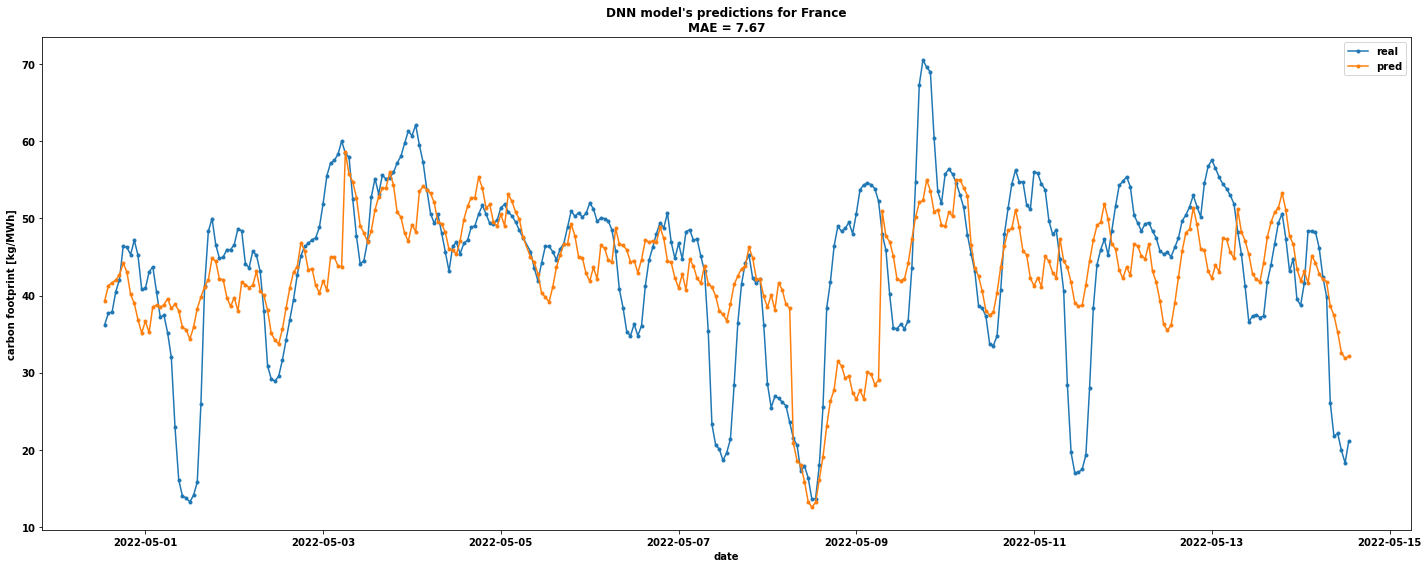

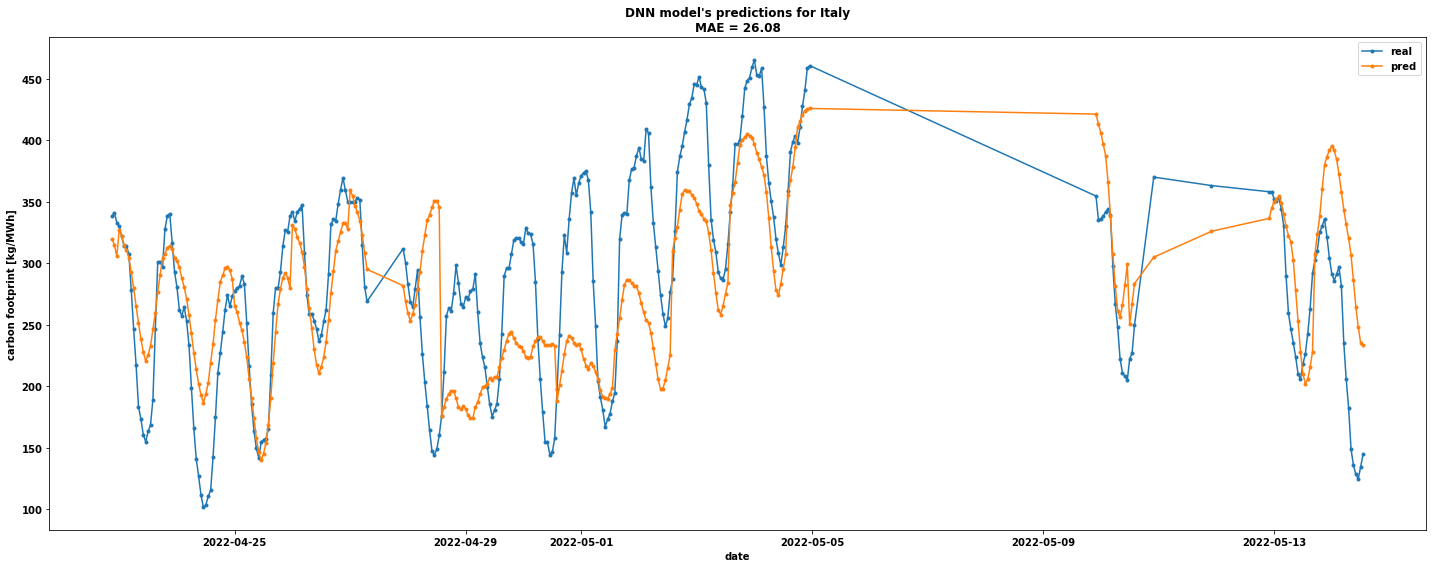

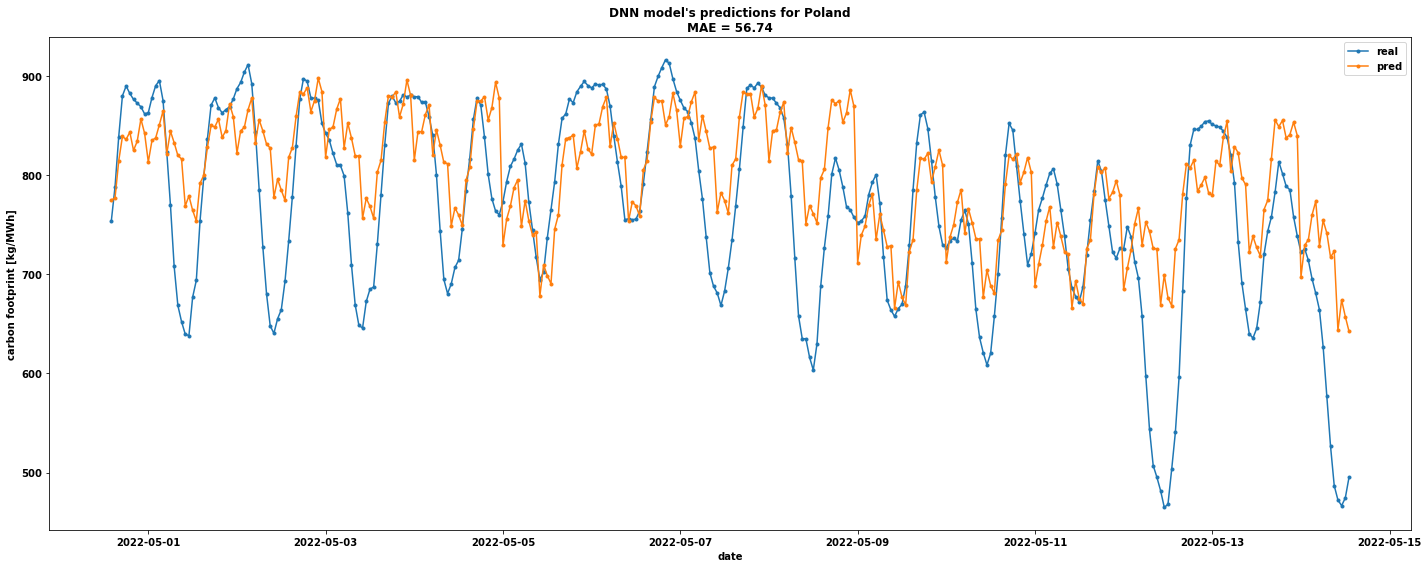

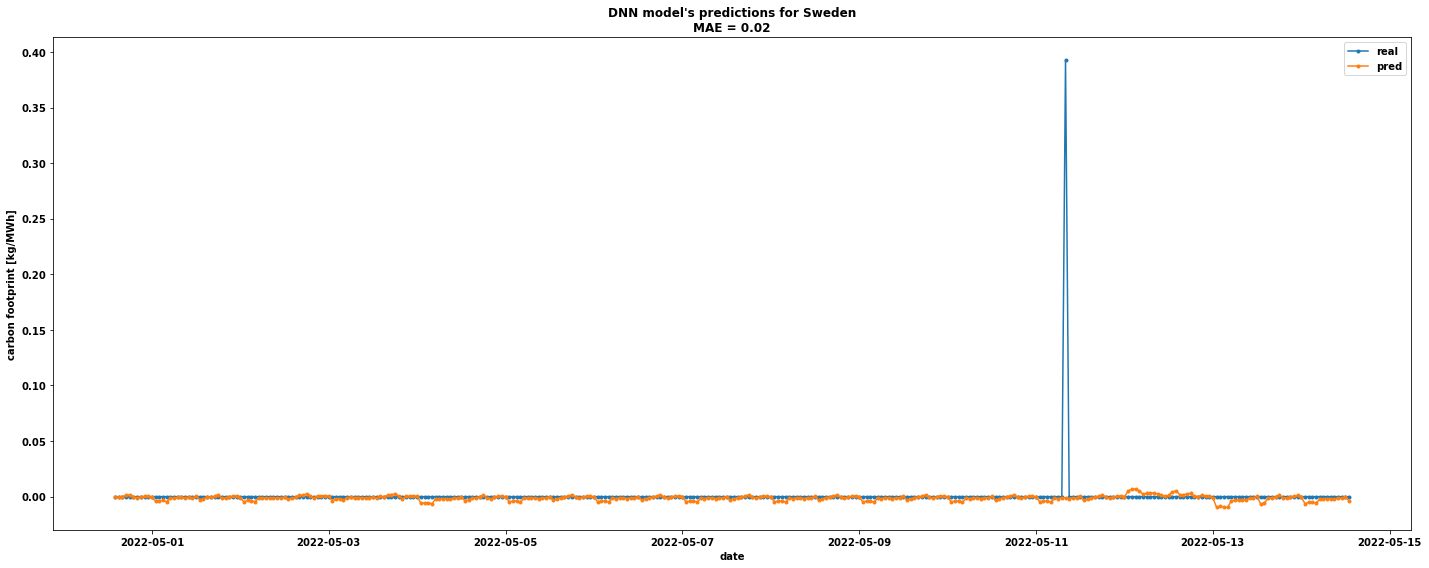

In [23]:
for state, df, pred_dict in zip(state_list, df_list, preds_list):
    
    df.datetime = pd.to_datetime(df.datetime)
    
    x = list(pred_dict.keys())
    preds = list(pred_dict.values())
    real = df.loc[df.datetime.dt.year >= 2022, "carbon_per_MWh"].to_numpy()
    
    mae = np.mean(np.abs(real-preds))
    
    n = 14*24
    x, preds, real = x[-n:], preds[-n:], real[-n:]
    
    f = plt.figure(figsize=(20,8))
    plt.plot(x, real, '.-', label="real")
    plt.plot(x, preds, '.-', label="pred")
    plt.title(f"DNN model's predictions for {country_lut[state]}\nMAE = {mae:.2f}")
    plt.xlabel("date")
    plt.ylabel("carbon footprint [kg/MWh]")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"../data/europe/images/{state}_dnn_preds.pdf")

plt.show()